In [1]:
import sys
sys.path.append("../")
from matplotlib import pyplot as plt
from realized_vol.data_loader import MarketDataLoader
from realized_vol.vol_engine import RealizedVolEngine

In [25]:
loader = MarketDataLoader(start="2023-01-01")

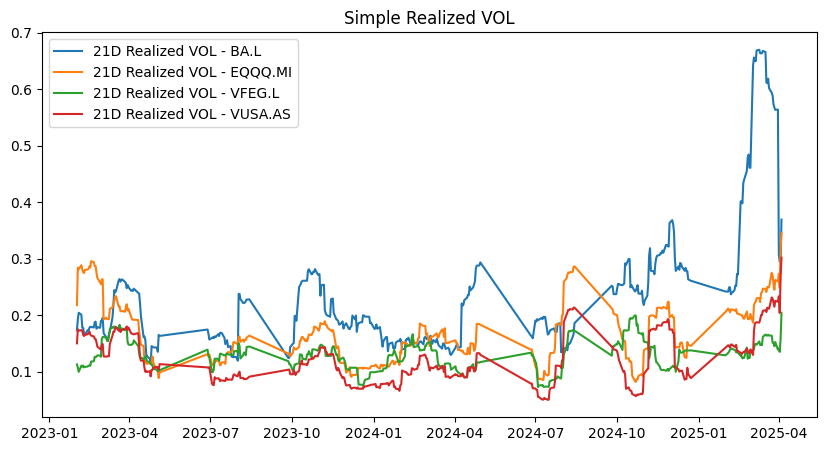

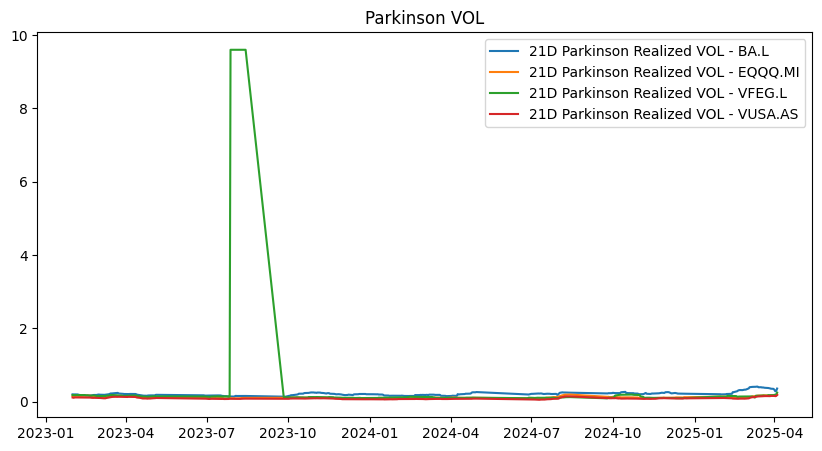

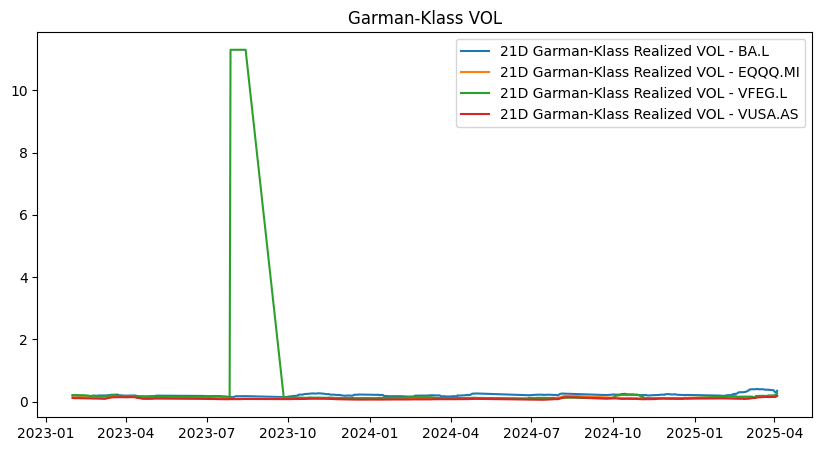

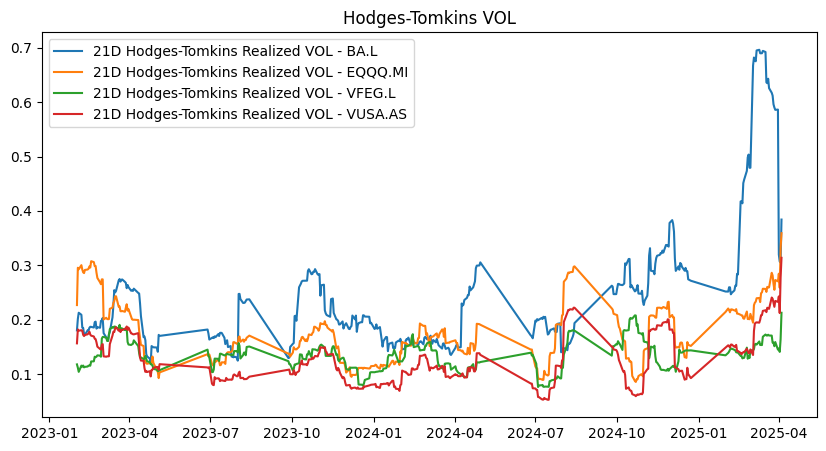

In [26]:
loader.set_tickers(['VUSA.AS', 'EQQQ.MI', 'VFEG.L', 'BA.L'])
prices = loader.fetch_price_series()

engine = RealizedVolEngine(prices, window=21)
simple_vol_21d = engine.compute_realized_vol().dropna()
gk_vol_21d = engine.compute_garman_klass_vol().dropna()
park_vol_21d = engine.compute_parkinson_vol().dropna()
ht_vol_21d = engine.compute_hodges_tomkins_vol().dropna()


plt.figure(figsize=(10, 5))
plt.title("Simple Realized VOL")
for ticker in simple_vol_21d:
    plt.plot(simple_vol_21d[ticker].dropna(), label=f'21D Realized VOL - {ticker}')
plt.legend()

plt.figure(figsize=(10, 5))
plt.title("Parkinson VOL")
for ticker in park_vol_21d:
    plt.plot(park_vol_21d[ticker].dropna(), label=f'21D Parkinson Realized VOL - {ticker}')
plt.legend()

plt.figure(figsize=(10, 5))
plt.title("Garman-Klass VOL")
for ticker in gk_vol_21d:
    plt.plot(gk_vol_21d[ticker].dropna(), label=f'21D Garman-Klass Realized VOL - {ticker}')
plt.legend()

plt.figure(figsize=(10, 5))
plt.title("Hodges-Tomkins VOL")
for ticker in ht_vol_21d:
    plt.plot(ht_vol_21d[ticker].dropna(), label=f'21D Hodges-Tomkins Realized VOL - {ticker}')
plt.legend()
